The idea of this notebook is to do the preprocessing of the penguin dataset with 3 different libraries: Scikit-Learn, Tensorflow and pytorch.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
df=pd.read_csv("../data/penguins_lter.csv")

In [21]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [22]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [23]:
df.shape

(344, 17)

In [24]:
df.Species.value_counts()

Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

In [25]:
df.Sex.value_counts()

Sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [26]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [27]:
df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

Droping colums comments, Delta 15N and Delta 13C. None of them are useful for training a model. 

In [28]:
df=df.drop('Comments', axis=1)
df=df.drop('Delta 15 N (o/oo)',axis=1)
df=df.drop('Delta 13 C (o/oo)',axis=1)
df=df.drop('Individual ID',axis=1)
df=df.drop('Date Egg',axis=1)
df=df.drop('studyName',axis=1)

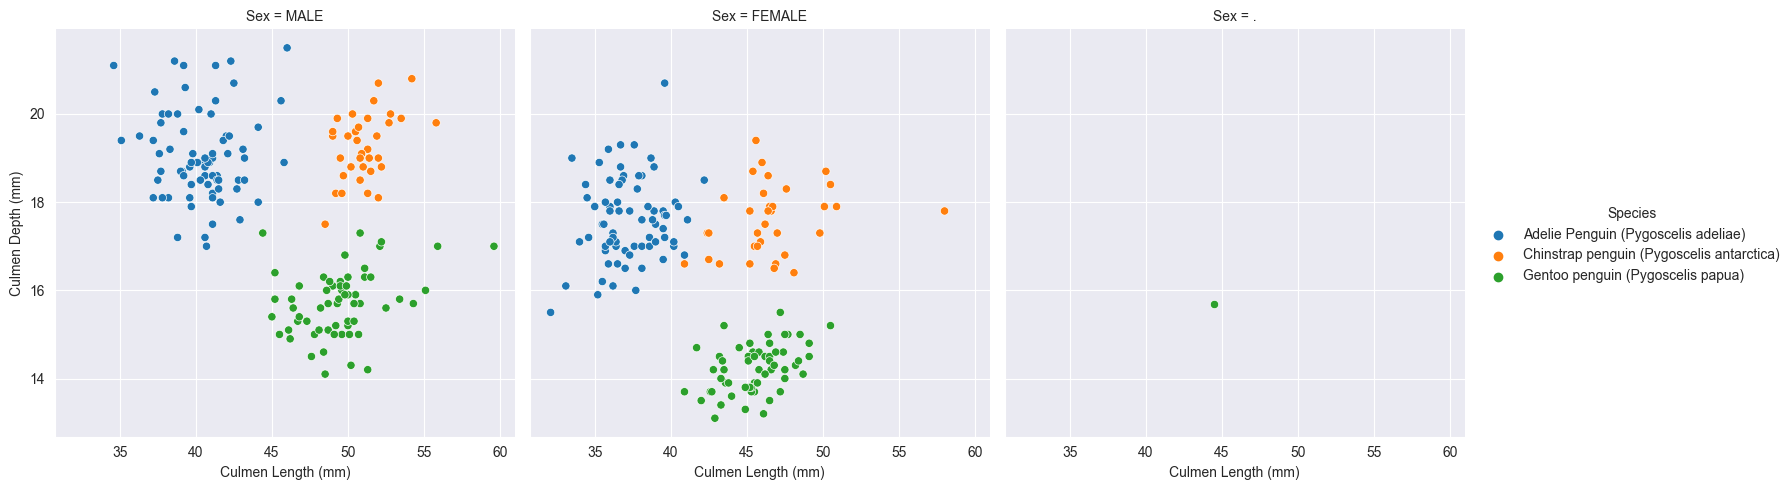

In [29]:
sns.relplot(
    data=df,
    x="Culmen Length (mm)", y="Culmen Depth (mm)", col="Sex", hue="Species"
)

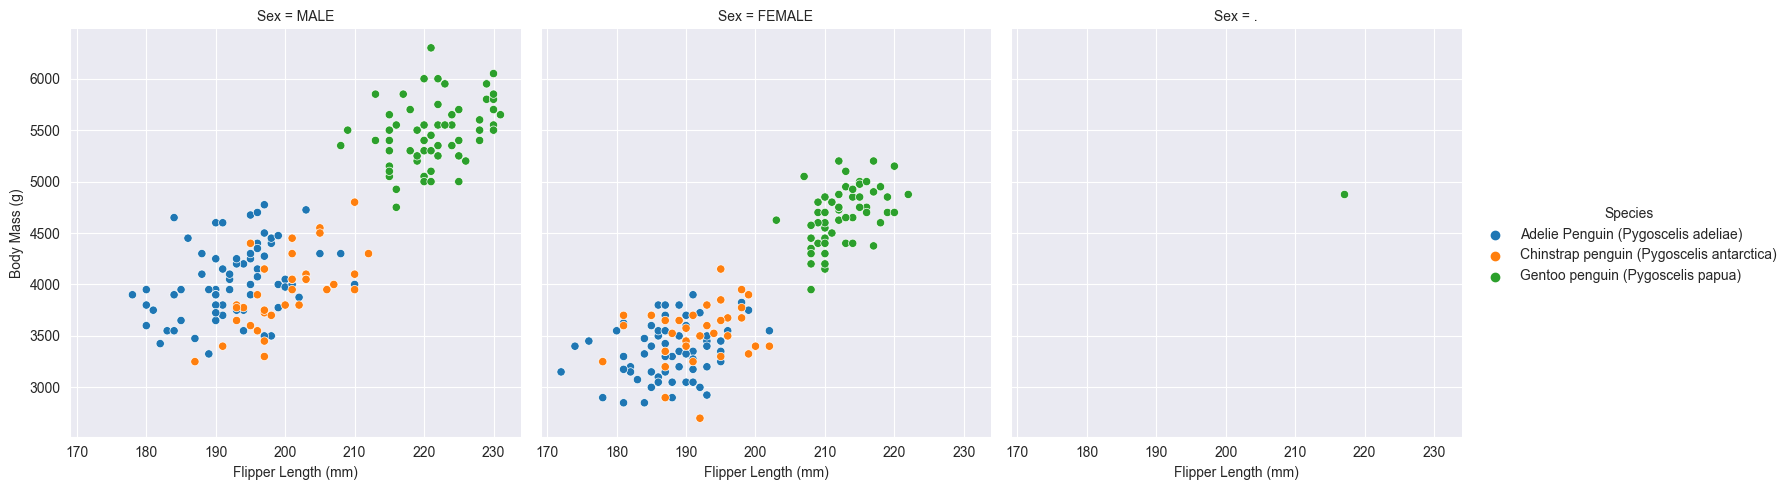

In [30]:
sns.relplot(
    data=df,
    x="Flipper Length (mm)", y="Body Mass (g)", col="Sex", hue="Species"
)

<Axes: xlabel='Island', ylabel='Body Mass (g)'>

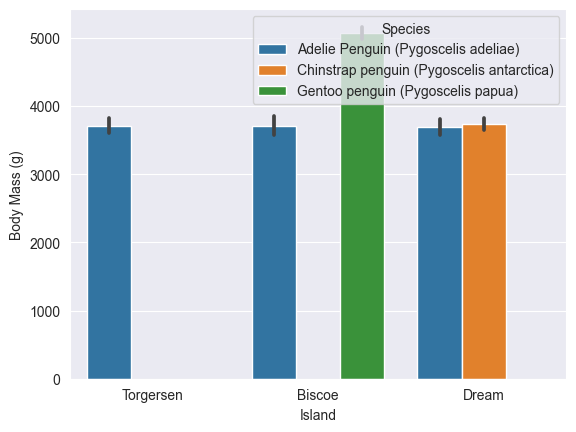

In [31]:
sns.barplot(data=df,  x="Island", y="Body Mass (g)", hue="Species")

<Axes: xlabel='Region', ylabel='Body Mass (g)'>

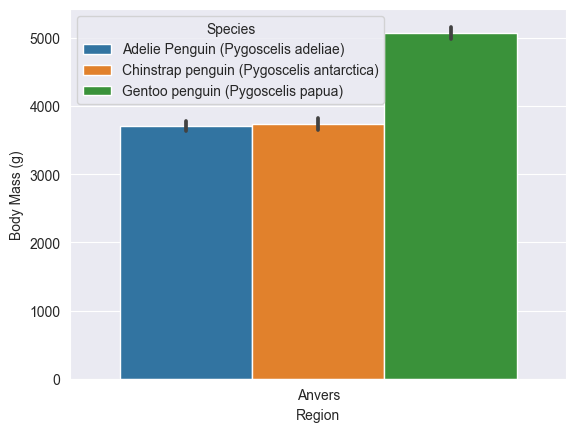

In [32]:
sns.barplot(data=df,  x="Region", y="Body Mass (g)", hue="Species")

In [33]:
df["Stage"].value_counts()

Stage
Adult, 1 Egg Stage    344
Name: count, dtype: int64

Since Region and Stage is only one value we are going to drop it as well as the sample number

In [34]:
df=df.drop("Region",axis=1)
df=df.drop('Sample Number',axis=1)
df=df.drop('Stage',axis=1)

Preprocessing on Scikit-Learn

Steps:
1. Deal with null values
2. Convert species to a numerical value
3. Convert other categorical values
3. Define the pipeline

In [35]:
df.columns

Index(['Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

In [36]:
X=df.drop("Species", axis=1)
y=df["Species"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
numeric_features = X_train.select_dtypes(include=np.number).columns
categorical_features = list(set(X_train.columns) - set(numeric_features))

Pipeline

In [37]:
numeric_process = Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.NaN, strategy='median')),
                                          ('scaler', StandardScaler())])
categorical_process = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessing_pipeline = ColumnTransformer(transformers=[('num', numeric_process, numeric_features),
                                                                 ('cat', categorical_process, categorical_features)],
                                                   remainder='drop')

In [38]:
X_train=preprocessing_pipeline.fit_transform(X_train)

In [39]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y = LE.fit_transform(y)



Pytorch loading

In [40]:
import torch
from torch.utils.data import Dataset, DataLoader
import time

In [41]:
import pandas as pd
import torch
import random

# creating dummy targets (float values)
targets_data = [random.random() for i in range(10)]
targets_data


[0.6481755297729624,
 0.11963463926925921,
 0.7984534541352054,
 0.47091003176420043,
 0.4461601169555862,
 0.46924172527388297,
 0.9731263133642631,
 0.2532942851198555,
 0.9305129426485435,
 0.0751193660410796]

In [42]:
class PenguinDataset(Dataset):
    def __init__(self, labels = None, attributes= None):
        self.labels = torch.tensor(labels)
        self.attributes = torch.tensor(attributes)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        label = self.labels[idx]
        text = self.attributes[idx]
        sample = {"Text": text, "Class": label}
        return sample


In [43]:
start_time = time.time()
df_pytorch=PenguinDataset(X_train, y)
loader= DataLoader(df_pytorch, batch_size=10, shuffle=True, num_workers= 0, pin_memory= False, drop_last=True)

for (idx, batch) in enumerate(df_pytorch):

    # Print the 'text' data of the batch
    print(idx, 'Text data: ', batch, '\n')

    # Print the 'class' data of batch
    print(idx, 'Class data: ', batch, '\n')

print ("My program took", time.time() - start_time, "to run")

0 Text data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([-1.5180, -0.4376, -0.4325, -1.0638,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  1.0000,  0.0000,  0.0000], dtype=torch.float64)} 

0 Class data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([-1.5180, -0.4376, -0.4325, -1.0638,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  1.0000,  0.0000,  0.0000], dtype=torch.float64)} 

1 Text data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([ 0.5390, -0.8427,  0.9716,  1.1826,  0.0000,  1.0000,  0.0000,  0.0000,
         1.0000,  1.0000,  0.0000,  0.0000], dtype=torch.float64)} 

1 Class data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([ 0.5390, -0.8427,  0.9716,  1.1826,  0.0000,  1.0000,  0.0000,  0.0000,
         1.0000,  1.0000,  0.0000,  0.0000], dtype=torch.float64)} 

2 Text data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([-0.8445,  1.2838, -0.4325,  0.5898,  0.0000,  1.0000,  0.0000,  1.0000,
         0.0

In [44]:
start_time = time.time()
df_pytorch=PenguinDataset(X_train, y)
loader= DataLoader(df_pytorch, batch_size=10, shuffle=True, num_workers= 3, pin_memory= True, drop_last=True)

for (idx, batch) in enumerate(df_pytorch):

    # Print the 'text' data of the batch
    print(idx, 'Text data: ', batch, '\n')

    # Print the 'class' data of batch
    print(idx, 'Class data: ', batch, '\n')

print ("My program took", time.time() - start_time, "to run")

0 Text data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([-1.5180, -0.4376, -0.4325, -1.0638,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  1.0000,  0.0000,  0.0000], dtype=torch.float64)} 

0 Class data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([-1.5180, -0.4376, -0.4325, -1.0638,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  1.0000,  0.0000,  0.0000], dtype=torch.float64)} 

1 Text data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([ 0.5390, -0.8427,  0.9716,  1.1826,  0.0000,  1.0000,  0.0000,  0.0000,
         1.0000,  1.0000,  0.0000,  0.0000], dtype=torch.float64)} 

1 Class data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([ 0.5390, -0.8427,  0.9716,  1.1826,  0.0000,  1.0000,  0.0000,  0.0000,
         1.0000,  1.0000,  0.0000,  0.0000], dtype=torch.float64)} 

2 Text data:  {'Text': tensor(0, dtype=torch.int32), 'Class': tensor([-0.8445,  1.2838, -0.4325,  0.5898,  0.0000,  1.0000,  0.0000,  1.0000,
         0.0

In [46]:
import pickle

In [48]:
with open("Label_Encoder.pkl", "wb") as file:
    pickle.dump(LE, file) # Dump function is used to write the object into the created file in byte format.

In [53]:
from sklearn.tree import DecisionTreeClassifier

input_features=['Culmen Lenght (mm)', 'Culmen Depth (mm)', 'Flipper Lenght (mm)']

# create the model
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train[[input_features]], y_train)

y_pred = tree_model.predict(X_test[input_features])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [54]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'